In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## PCA

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [3]:
data=load_iris()
X=pd.DataFrame(data.data)
Y=pd.DataFrame(data.target.reshape(-1,1))

In [4]:
pca=PCA(n_components=2,random_state=1)
x_d=pd.DataFrame(pca.fit_transform(X,Y))
print(x_d.shape)

(150, 2)


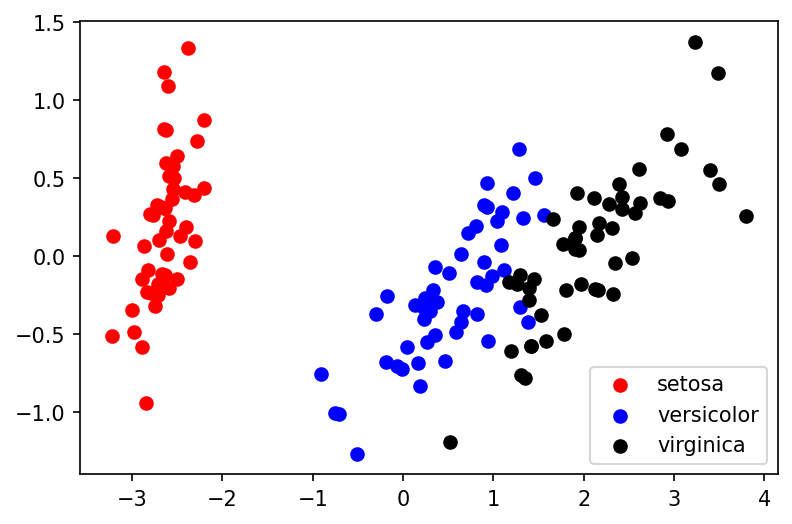

In [5]:
colorbar=['r','b','k']
figure=plt.figure(dpi=150)
for i in range(3):
    index=[j for j in Y.index if Y.iloc[j,0]==i]
    x=x_d[0].iloc[index]
    y=x_d[1].iloc[index]
    
    plt.scatter(x,y,c=colorbar[i],label=data.target_names[i])
    plt.legend()

In [6]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [7]:
pca.explained_variance_ratio_.sum()

0.977685206318795

In [8]:
pca_1=PCA().fit(X,Y)

In [9]:
pca_1.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [10]:
np.cumsum(pca_1.explained_variance_ratio_)

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

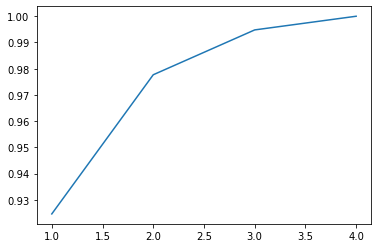

In [11]:
plt.plot(range(1,5),np.cumsum(pca_1.explained_variance_ratio_))

## SVD

## 人脸

In [12]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

In [13]:
faces=fetch_lfw_people(min_faces_per_person=60)

In [14]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [15]:
print(faces.data.shape)
print(faces.images.shape)

(1348, 2914)
(1348, 62, 47)


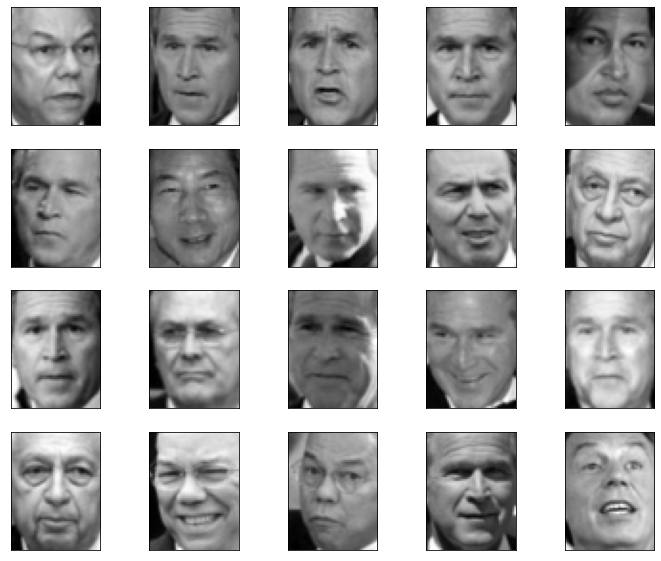

In [16]:
fig,ax=plt.subplots(4,5,figsize=(12,10))

index=0
for i in range(4):
    for j in range(5):
        ax[i][j].imshow(faces.images[index],cmap='gray')
        index+=1
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])


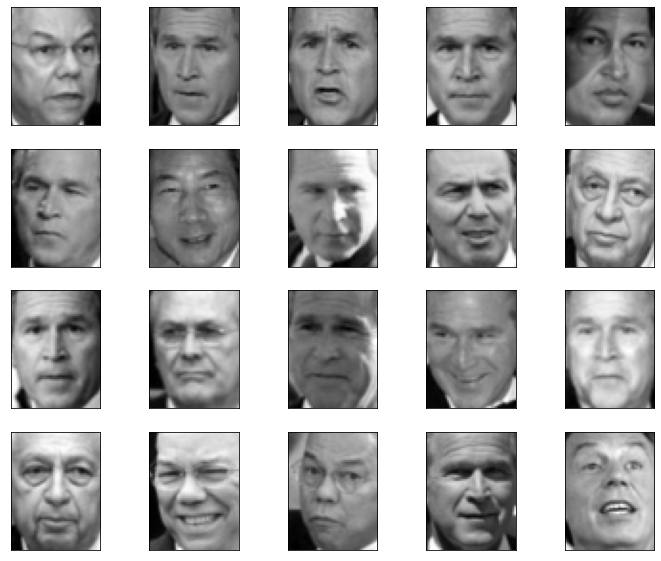

In [17]:
fig,axes=plt.subplots(4,5,figsize=(12,10),subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(faces.images[i],cmap='gray')

In [18]:
pca=PCA(n_components=150,random_state=1)
x_d=pca.fit_transform(faces.data)
components=pca.components_
print(components.shape)
print(pca.explained_variance_ratio_.cumsum())

(150, 2914)
[0.18782721 0.3333305  0.40433156 0.46462154 0.5150232  0.5443854
 0.5690782  0.58955604 0.60924226 0.6281566  0.643769   0.65846825
 0.67061305 0.68157065 0.69199884 0.70171875 0.71078706 0.7195571
 0.72768766 0.7347349  0.7415635  0.74804235 0.7540773  0.75986123
 0.76518387 0.7703907  0.7753909  0.7801554  0.7846798  0.78893185
 0.7929835  0.79678416 0.8003828  0.8038915  0.8073697  0.8106185
 0.81376326 0.8168681  0.819945   0.8228442  0.8256703  0.8284178
 0.8311459  0.8337456  0.8362111  0.83859307 0.8409435  0.84325874
 0.8455314  0.8477497  0.84985536 0.85191333 0.8539433  0.85594976
 0.8579073  0.8598616  0.86174256 0.8635702  0.86533713 0.8670957
 0.868845   0.8705082  0.8721213  0.87370694 0.8752727  0.87680155
 0.8783014  0.87976253 0.88121516 0.8826256  0.88403076 0.88539493
 0.8867561  0.8880723  0.889365   0.89062065 0.89187    0.893101
 0.8943077  0.89549536 0.89666945 0.89782363 0.8989552  0.90005696
 0.90114546 0.90222013 0.9032731  0.90430933 0.9053284  0

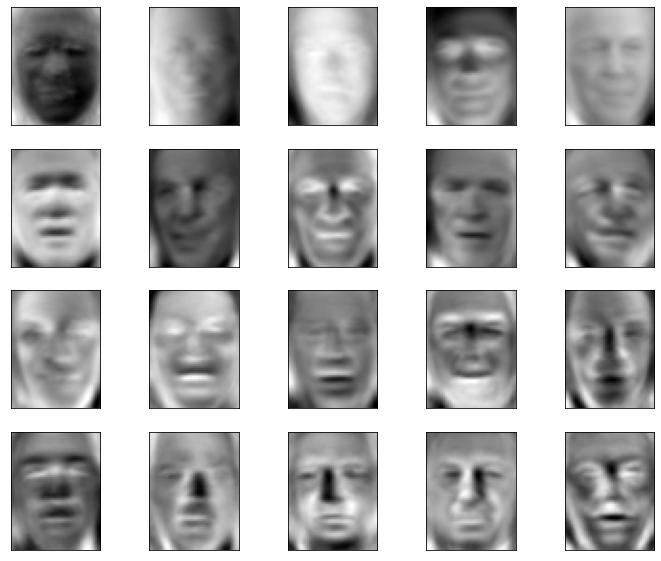

In [19]:
# components[0,:].reshape(62,47)
# plt.imshow(components[0,:].reshape(62,47))

fig,axes=plt.subplots(4,5,figsize=(12,10),subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
    data=components[i,:].reshape(62,47)
    ax.imshow(data,cmap='gray')


In [20]:
print(faces.images.shape)

print(faces.data.shape)

print(components.shape)

print(x_d.shape)

(1348, 62, 47)
(1348, 2914)
(150, 2914)
(1348, 150)


In [21]:
x_inv=pca.inverse_transform(x_d)
x_inv.shape

(1348, 2914)

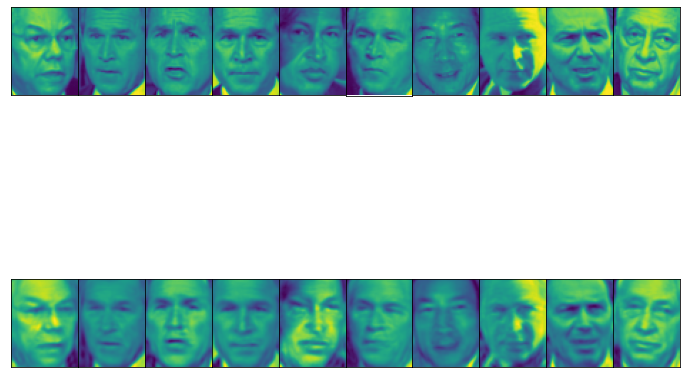

In [22]:
fig,ax=plt.subplots(2,10,figsize=(12,10),subplot_kw={'xticks':[],'yticks':[]})
fig.subplots_adjust(wspace =0, hspace =0)
[ax[0][i].imshow(faces.images[i]) for i in range(10)]
[ax[1][j].imshow(x_inv[j,:].reshape(62,47)) for j in range(10)]

In [23]:
x_inv[1,:].reshape(62,47).shape

(62, 47)

In [24]:
x_inv.shape

(1348, 2914)

## 噪音过滤

In [25]:
from sklearn.datasets import load_digits

In [26]:
digits=load_digits()

In [27]:
pd.DataFrame(digits.target).drop_duplicates()

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [28]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


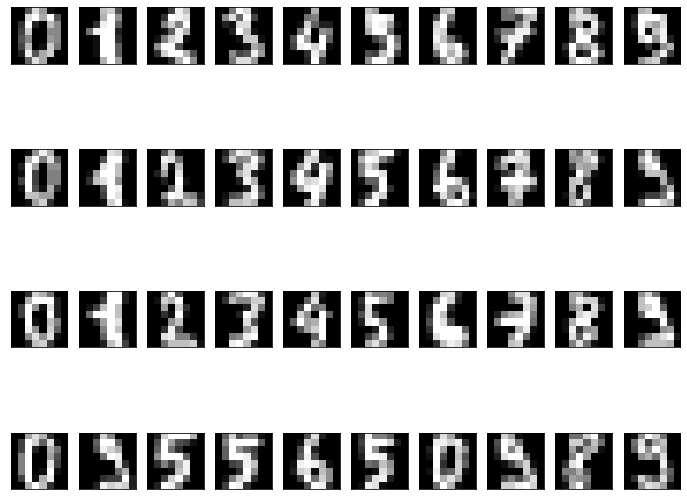

In [29]:
fig,axes=plt.subplots(4,10,figsize=(12,10),subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.data[i].reshape(8,8),cmap='binary_r')
    

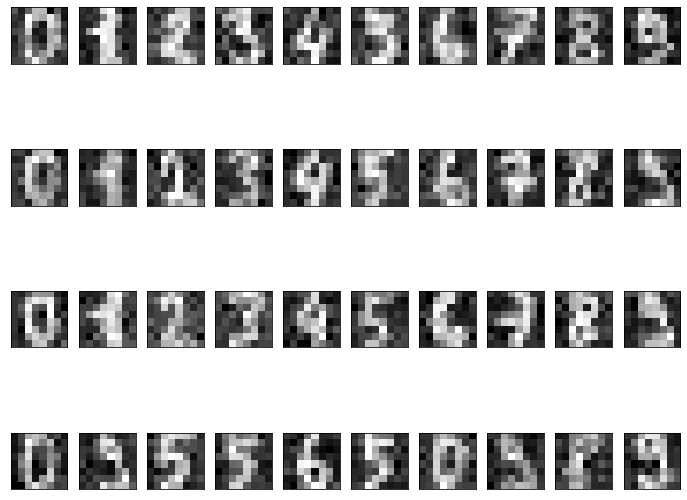

In [30]:
rs=np.random.RandomState(1)
noise=rs.normal(digits.data,2)

fig,axes=plt.subplots(4,10,figsize=(12,10),subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(noise[i,:].reshape(8,8),cmap='binary_r')

(1797, 6)
(1797, 64)


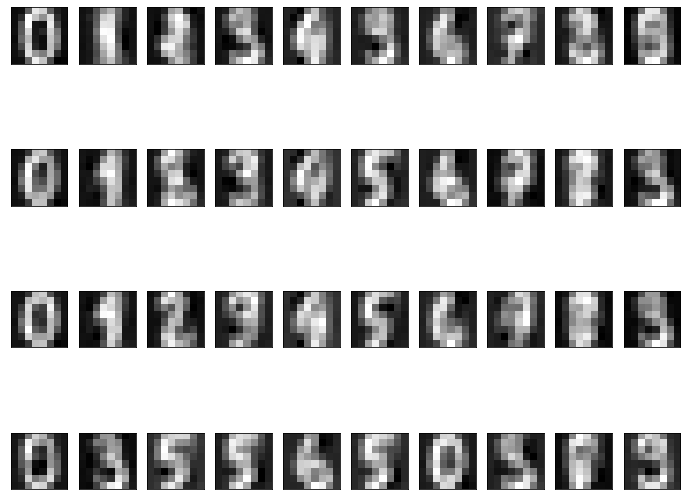

In [31]:
pca=PCA(n_components=0.5,svd_solver='full')
x_d=pca.fit_transform(noise)
print(x_d.shape)
x_ivr=pca.inverse_transform(x_d)
print(x_ivr.shape)

fig,axes=plt.subplots(4,10,figsize=(12,10),subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(x_ivr[i,:].reshape(8,8),cmap='binary_r')

## 数字识别

In [32]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
data=pd.read_csv('/Users/hurrywish/Downloads/Python_sklearn/【第01部分 核心教程】sklearn深度学习框架入门与实战 3套/02.2019年Scikit-learn的机器学习入门到精通（附讲义、代码、数据集、参考资料） 258课/00.配套资料（代码、讲义、数据等）/00.配套资料（代码、讲义、数据等）/03数据预处理和特征工程/digit recognizor.csv')

In [34]:
label=data['label']
sample=data[[i for i in data.columns if i != 'label']]
print(label.shape,sample.shape)

(42000,) (42000, 784)


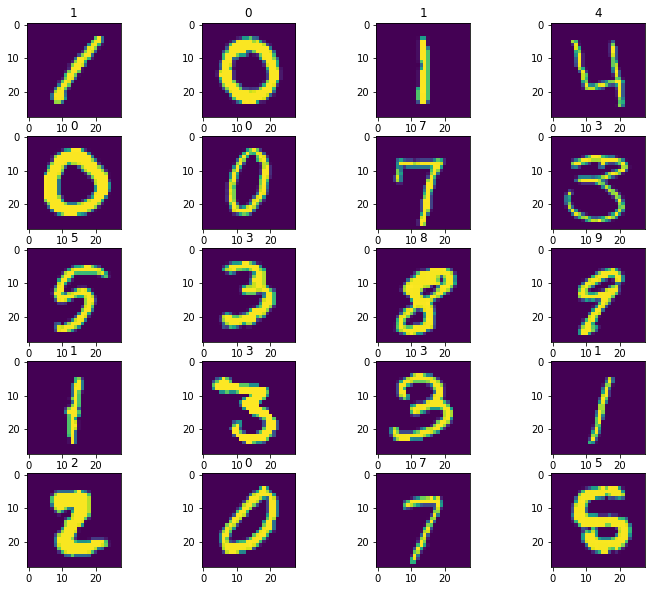

In [35]:
fig,axes=plt.subplots(5,4,figsize=(12,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(sample.iloc[i].values.reshape(28,28))
    ax.set_title(str(label[i]))
    

In [36]:
pca=PCA().fit(sample)
cumsum=pca.explained_variance_ratio_.cumsum()
for i,j in enumerate(cumsum):
    if j >=0.9:
        print(i)
        break
print(len(cumsum))

86
784


In [37]:
len(cumsum[[cumsum<0.9]].tolist())

/Users/hurrywish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


86

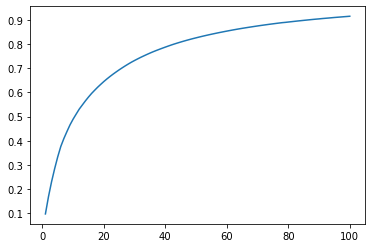

In [38]:
contrib_list=list()
for i in range(1,101):
    pca=PCA(n_components=i).fit(sample)
    contrib_list.append(pca.explained_variance_ratio_.sum())
plt.plot(range(1,101),contrib_list)

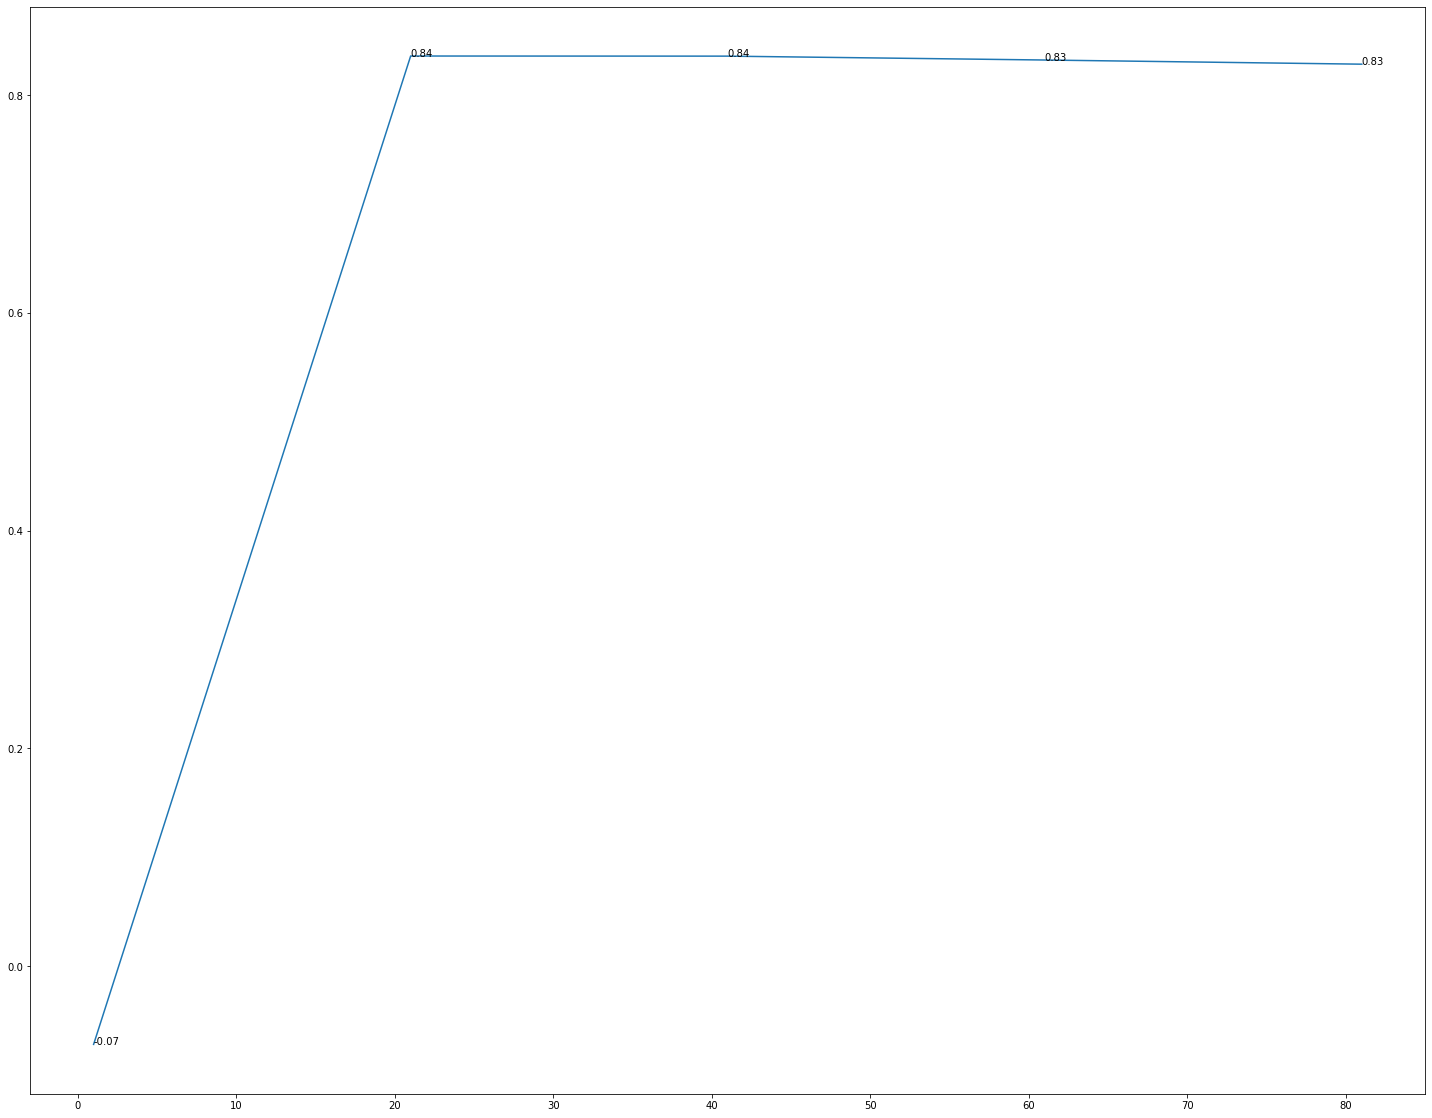

In [39]:
scores=list()
plt.figure(figsize=(25,20))
for i in range(1,101,20):
    x_d=PCA(n_components=i).fit_transform(sample)
    rfc=RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)
    score=cross_val_score(rfc,x_d,label,cv=5).mean()
    scores.append(score)
plt.plot(range(1,101,20),scores)

index=0
for i,j in zip(range(1,101,20),scores):
    number=round(scores[index],2)
    plt.text(i,j,number)
    index+=1



In [50]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

pca_opt=PCA(21)
sample_dec=pca_opt.fit_transform(sample,label)

rfc=RandomForestRegressor(n_estimators=10,n_jobs=-1)
kms=KMeans(n_clusters=10)
knn=KNeighborsClassifier(n_neighbors=10,n_jobs=-1)

cross_val_score(knn,sample_dec,label,cv=5).mean()

0.9650238095238095

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the sa

In [ ]:
kms=KMeans